In [470]:
import pandas as pd


In [471]:
df=pd.read_csv(r'C:\Users\Deepak Raj\Desktop\Data_Science\Machine Learning\Data\tweets1.csv')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
993,"#sxsw two parties down (Awesome Journalism, NP...",NaN,No emotion toward brand or product
994,At google party. Best ever! Get your butt over...,Google,Positive emotion
995,Hey #sxsw peeps! Our new IPhone app ON #Voicef...,iPad or iPhone App,Positive emotion
996,Watch how people interact with information... ...,NaN,No emotion toward brand or product


In [472]:
##Basic checks

In [473]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          997 non-null    object
 1   emotion_in_tweet_is_directed_at                     393 non-null    object
 2   is_there_an_emotion_directed_at_a_brand_or_product  998 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [474]:
#statistical information 
df.describe(include='O')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,997,393,998
unique,995,9,4
top,Google to Launch Major New Social Network Call...,iPad,No emotion toward brand or product
freq,2,101,569


## Data Preprocessing

In [475]:
#duplicate values
df.duplicated().sum()

2

In [476]:
#duplicate rows
df[df['tweet_text'].duplicated()==True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product


In [477]:
# dropping ALL duplicate values
df.drop_duplicates(subset ="tweet_text",
                     keep = False, inplace = True)

In [478]:
df.duplicated().sum()

0

In [479]:
#no duplicate values
df[df['tweet_text'].duplicated()==True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


In [480]:
#null values
df.isnull().sum()

tweet_text                                              1
emotion_in_tweet_is_directed_at                       603
is_there_an_emotion_directed_at_a_brand_or_product      0
dtype: int64

In [481]:
df[df['tweet_text'].isnull()==True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,No emotion toward brand or product


In [482]:
#replace null value by mode
df.loc[df['tweet_text'].isnull()==True,'tweet_text']=df.tweet_text.mode()[0]

In [483]:
df[df['tweet_text'].isnull()==True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


In [484]:
df[df['tweet_text'].isnull()==True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


In [485]:
df.isnull().sum()

tweet_text                                              0
emotion_in_tweet_is_directed_at                       603
is_there_an_emotion_directed_at_a_brand_or_product      0
dtype: int64

In [486]:
df[df['emotion_in_tweet_is_directed_at'].isnull()==True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,#4sq sees Facebook and Google as competition v...,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
991,One #SXSW panel moderator who is from the Euro...,NaN,No emotion toward brand or product
992,The brown paper on the windows as the line gro...,NaN,No emotion toward brand or product
993,"#sxsw two parties down (Awesome Journalism, NP...",NaN,No emotion toward brand or product
996,Watch how people interact with information... ...,NaN,No emotion toward brand or product


In [487]:
#replace null value by mode
df.loc[df['emotion_in_tweet_is_directed_at'].isnull()==True,'emotion_in_tweet_is_directed_at']=df.emotion_in_tweet_is_directed_at.mode()[0]

In [488]:
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

## Exploratory Data analysis

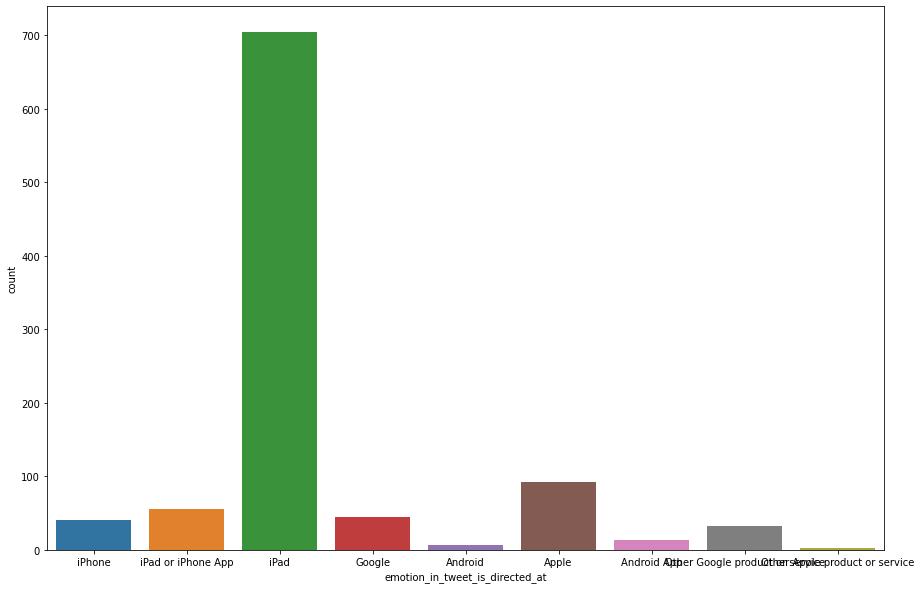

In [489]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
ax=sns.countplot(x='emotion_in_tweet_is_directed_at',data=df)

In [490]:
#most of people are using ipad

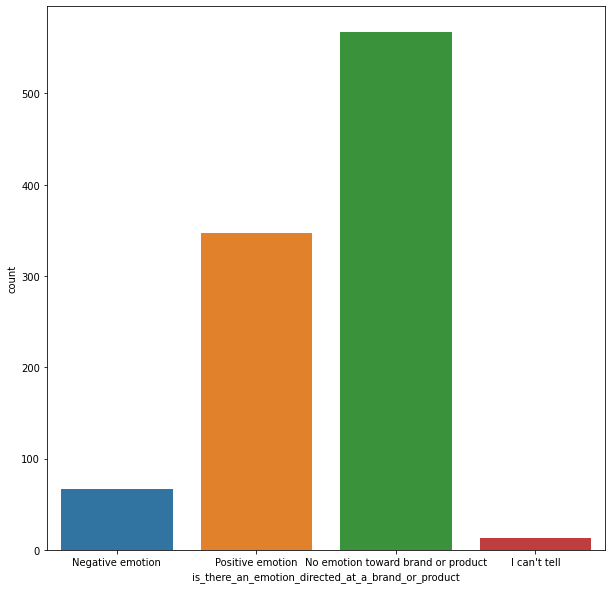

In [491]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product',data=df)

In [492]:
#most people are having no emotion

**Text preprocessing**

In [493]:
df['tweet_text']

0      .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1      @jessedee Know about @fludapp ? Awesome iPad/i...
2      @swonderlin Can not wait for #iPad 2 also. The...
3      @sxsw I hope this year's festival isn't as cra...
4      @sxtxstate great stuff on Fri #SXSW: Marissa M...
                             ...                        
993    #sxsw two parties down (Awesome Journalism, NP...
994    At google party. Best ever! Get your butt over...
995    Hey #sxsw peeps! Our new IPhone app ON #Voicef...
996    Watch how people interact with information... ...
997    Hey #sxsw people! Survival tip no 2. Great veg...
Name: tweet_text, Length: 994, dtype: object

In [494]:
#library that contains punctuation
import string
string.punctuation


def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df['clean_Text']= df['tweet_text'].apply(lambda x:remove_punctuation(x))
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 I have a 3G iPhone After 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPadiPhon...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad 2 also They s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa Maye...


In [495]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Deepak
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Deepak
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [496]:
from nltk.tokenize import word_tokenize
df['clean_Text']=df['clean_Text'].apply(word_tokenize)

In [497]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[wesley83, I, have, a, 3G, iPhone, After, 3, h..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[jessedee, Know, about, fludapp, Awesome, iPad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[swonderlin, Can, not, wait, for, iPad, 2, als..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[sxsw, I, hope, this, years, festival, isnt, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[sxtxstate, great, stuff, on, Fri, SXSW, Maris..."
...,...,...,...,...
993,"#sxsw two parties down (Awesome Journalism, NP...",iPad,No emotion toward brand or product,"[sxsw, two, parties, down, Awesome, Journalism..."
994,At google party. Best ever! Get your butt over...,Google,Positive emotion,"[At, google, party, Best, ever, Get, your, but..."
995,Hey #sxsw peeps! Our new IPhone app ON #Voicef...,iPad or iPhone App,Positive emotion,"[Hey, sxsw, peeps, Our, new, IPhone, app, ON, ..."
996,Watch how people interact with information... ...,iPad,No emotion toward brand or product,"[Watch, how, people, interact, with, informati..."


In [498]:
#stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Deepak
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [499]:
#remove stopwords
df['clean_Text']=df['clean_Text'].apply(lambda x: [item for item in x if item not in stop_words])

In [500]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[wesley83, I, 3G, iPhone, After, 3, hrs, tweet..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[jessedee, Know, fludapp, Awesome, iPadiPhone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[swonderlin, Can, wait, iPad, 2, also, They, s..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[sxsw, I, hope, years, festival, isnt, crashy,..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ..."
...,...,...,...,...
993,"#sxsw two parties down (Awesome Journalism, NP...",iPad,No emotion toward brand or product,"[sxsw, two, parties, Awesome, Journalism, NPRG..."
994,At google party. Best ever! Get your butt over...,Google,Positive emotion,"[At, google, party, Best, ever, Get, butt, sxsw]"
995,Hey #sxsw peeps! Our new IPhone app ON #Voicef...,iPad or iPhone App,Positive emotion,"[Hey, sxsw, peeps, Our, new, IPhone, app, ON, ..."
996,Watch how people interact with information... ...,iPad,No emotion toward brand or product,"[Watch, people, interact, information, differe..."


In [501]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['emotion_in_tweet_is_directed_at']=LE.fit_transform(df.emotion_in_tweet_is_directed_at)

In [502]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,8,Negative emotion,"[wesley83, I, 3G, iPhone, After, 3, hrs, tweet..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,7,Positive emotion,"[jessedee, Know, fludapp, Awesome, iPadiPhone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,6,Positive emotion,"[swonderlin, Can, wait, iPad, 2, also, They, s..."
3,@sxsw I hope this year's festival isn't as cra...,7,Negative emotion,"[sxsw, I, hope, years, festival, isnt, crashy,..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3,Positive emotion,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ..."
...,...,...,...,...
993,"#sxsw two parties down (Awesome Journalism, NP...",6,No emotion toward brand or product,"[sxsw, two, parties, Awesome, Journalism, NPRG..."
994,At google party. Best ever! Get your butt over...,3,Positive emotion,"[At, google, party, Best, ever, Get, butt, sxsw]"
995,Hey #sxsw peeps! Our new IPhone app ON #Voicef...,7,Positive emotion,"[Hey, sxsw, peeps, Our, new, IPhone, app, ON, ..."
996,Watch how people interact with information... ...,6,No emotion toward brand or product,"[Watch, people, interact, information, differe..."


In [503]:
#Label_encoder
df['is_there_an_emotion_directed_at_a_brand_or_product']=LE.fit_transform(df.is_there_an_emotion_directed_at_a_brand_or_product)

In [504]:
df.rename(columns={'emotion_in_tweet_is_directed_at':'emotion_in_tweet','is_there_an_emotion_directed_at_a_brand_or_product':'emotion_at_a_brand'},inplace=True) #rename column

In [505]:
df

,tweet_text,emotion_in_tweet,emotion_at_a_brand,clean_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,8,1,"[wesley83, I, 3G, iPhone, After, 3, hrs, tweet..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,7,3,"[jessedee, Know, fludapp, Awesome, iPadiPhone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,6,3,"[swonderlin, Can, wait, iPad, 2, also, They, s..."
3,@sxsw I hope this year's festival isn't as cra...,7,1,"[sxsw, I, hope, years, festival, isnt, crashy,..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3,3,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ..."
...,...,...,...,...
993,"#sxsw two parties down (Awesome Journalism, NP...",6,2,"[sxsw, two, parties, Awesome, Journalism, NPRG..."
994,At google party. Best ever! Get your butt over...,3,3,"[At, google, party, Best, ever, Get, butt, sxsw]"
995,Hey #sxsw peeps! Our new IPhone app ON #Voicef...,7,3,"[Hey, sxsw, peeps, Our, new, IPhone, app, ON, ..."
996,Watch how people interact with information... ...,6,2,"[Watch, people, interact, information, differe..."


In [506]:
cleaned_Text=df['clean_Text']
cleaned_Text

0      [wesley83, I, 3G, iPhone, After, 3, hrs, tweet...
1      [jessedee, Know, fludapp, Awesome, iPadiPhone,...
2      [swonderlin, Can, wait, iPad, 2, also, They, s...
3      [sxsw, I, hope, years, festival, isnt, crashy,...
4      [sxtxstate, great, stuff, Fri, SXSW, Marissa, ...
                             ...                        
993    [sxsw, two, parties, Awesome, Journalism, NPRG...
994     [At, google, party, Best, ever, Get, butt, sxsw]
995    [Hey, sxsw, peeps, Our, new, IPhone, app, ON, ...
996    [Watch, people, interact, information, differe...
997    [Hey, sxsw, people, Survival, tip, 2, Great, v...
Name: clean_Text, Length: 994, dtype: object

## Model building

In [507]:
x=df.clean_Text
x

0      [wesley83, I, 3G, iPhone, After, 3, hrs, tweet...
1      [jessedee, Know, fludapp, Awesome, iPadiPhone,...
2      [swonderlin, Can, wait, iPad, 2, also, They, s...
3      [sxsw, I, hope, years, festival, isnt, crashy,...
4      [sxtxstate, great, stuff, Fri, SXSW, Marissa, ...
                             ...                        
993    [sxsw, two, parties, Awesome, Journalism, NPRG...
994     [At, google, party, Best, ever, Get, butt, sxsw]
995    [Hey, sxsw, peeps, Our, new, IPhone, app, ON, ...
996    [Watch, people, interact, information, differe...
997    [Hey, sxsw, people, Survival, tip, 2, Great, v...
Name: clean_Text, Length: 994, dtype: object

In [508]:
y=df.emotion_at_a_brand
y.shape

(994,)

In [509]:
y=df.emotion_at_a_brand
y

0      1
1      3
2      3
3      1
4      3
      ..
993    2
994    3
995    3
996    2
997    2
Name: emotion_at_a_brand, Length: 994, dtype: int32

In [510]:
x.shape

(994,)

In [511]:
x.shape

(994,)

In [512]:
y.shape

(994,)

In [513]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [514]:
#tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()

In [515]:
#chain for list iteration
from itertools import chain
tokenized_list = list(chain(*x_train))
x_train_trans=vectorization.fit_transform(tokenized_list).todense()


In [516]:
tokenized_list1 = list(chain(*x_test))
x_test_trans=vectorization.fit_transform(tokenized_list1).todense()

In [517]:
x_test_trans

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [518]:
#convert matrix to array
import numpy as np
x_train_trans_ = np.array(x_train_trans[:745])
x_train_trans_.shape

(745, 2490)

In [519]:
x_test_trans_ = np.array(x_test_trans)
x_test_trans_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [520]:
from sklearn.naive_bayes import MultinomialNB
Mlb=MultinomialNB()
Mlb.fit(x_train_trans_,y_train)

MultinomialNB()

In [530]:
x_test_trans_.shape

(3176, 1167)

In [531]:
from sklearn.metrics import accuracy_score
Mlb.score(x_train_trans_,y_train)

0.723489932885906

In [522]:
y_test_pred=Mlb.predict(x_test_trans_)


ValueError: X has 1167 features, but MultinomialNB is expecting 2490 features as input.